In [138]:
# Add needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# VIF for multi-collinearity detection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models and modeling tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Change inline plots default size
plt.rcParams['figure.figsize'] = [12, 8]

## Summary: ##



Survey data was collected from a customer cohort and responses were used to develop a model to determine what aspects of the ordering and delivery process were most likely to lead to customer happiness. The model suggests the most important characteristics leading to customer happiness were `Find Everything Customer Wanted` (29.1%) and `On Time Delivery` (27.5%).  

The clearest story in the sample data was for `On Time Delivery`, where 65% of Happy respondents gave a 5/5 rating compared to only 35% of Unhappy respondents.  For `Find Everything Customer Wanted`, 48% of Happy respondents reated it 4/5 or above, compared to 30% of Unhappy respondents.

The model, which uses survey responses on `Good Prices` and an `Easy to Use app` as well as the above survey questions, provides about 70% accuracy in predicting the happiness of the customer.



## Final Model: ##

In [155]:
# Read in the rawData
columns = ['Happy', 'OnTime', 'OrderCorrect', 'FoundEverything', 'GoodPrice', 'DeliverySatisfaction', 'EasyToUse']
rawData = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0, names=columns)

# Separate data in independent (features) and dependent (target) datasets
# Exclude 'OrderCorrect' and 'DeliverySatisfaction' from features due to poor performance
x_final = rawData[['OnTime', 'FoundEverything', 'GoodPrice', 'EasyToUse']]
y_final = rawData[['Happy']]

clf = RandomForestClassifier(max_depth=9, min_samples_split=3, min_samples_leaf=1)

scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=StratifiedKFold(5))
print ('The mean cross-validation score is', round(scores.mean(),4)*100, '%', scores.std())

clf = clf.fit(x_final, np.ravel(y_final))
print (clf.feature_importances_)

#### Add test set here ####
## testData = pd.read_csv()
## x_test = testData[['OnTime', 'FoundEverything', 'GoodPrice', 'EasyToUse']]
## y_test = testData[['Happy']]
## clf.predict(x_test)

The mean cross-validation score is 70.71 % 0.112168934302173
[0.27545383 0.2911105  0.22992401 0.20351166]


## Work: ##

In [142]:
## Num Estimators Param Search ##
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)]
for nest in n_estimators:
    clf = RandomForestClassifier(n_estimators=nest)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=StratifiedKFold(5))
    print (nest, scores.mean(), scores.std())

50 0.7073846153846153 0.14119154809845336
75 0.683076923076923 0.13455691037690154
100 0.707076923076923 0.12814784361231057
125 0.7073846153846154 0.12431835445515627
150 0.6913846153846154 0.1341467888051949
175 0.699076923076923 0.1283397856929642
200 0.6993846153846154 0.1344217508463259
225 0.6993846153846154 0.1344217508463259
250 0.699076923076923 0.1283397856929642
275 0.699076923076923 0.1283397856929642
300 0.6993846153846154 0.1344217508463259
325 0.707076923076923 0.12814784361231057
350 0.6913846153846154 0.1341467888051949
375 0.6993846153846154 0.1344217508463259
400 0.707076923076923 0.12814784361231057
425 0.707076923076923 0.12814784361231057
450 0.6993846153846154 0.1344217508463259
475 0.699076923076923 0.1283397856929642
500 0.6993846153846154 0.1344217508463259


In [144]:
## Max Depth Samples Leaf Param Search ##
max_depth = [int(x) for x in np.linspace(1, 25, num = 13)]
for md in max_depth:
    clf = RandomForestClassifier(max_depth=md)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
    print (md, scores.mean(), scores.std())

1 0.5716923076923076 0.1211448348297077
3 0.6113846153846153 0.12123076923076923
5 0.6833846153846154 0.11538420512747578
7 0.6513846153846153 0.11741435251925038
9 0.699076923076923 0.1283397856929642
11 0.6913846153846154 0.12928789945987043
13 0.699076923076923 0.1283397856929642
15 0.6913846153846154 0.1341467888051949
17 0.699076923076923 0.12325218290852286
19 0.6833846153846154 0.1448913896437584
21 0.6913846153846154 0.12928789945987043
23 0.6913846153846154 0.1341467888051949
25 0.6993846153846154 0.1344217508463259


In [146]:
## Min Samples Split Param Search ##
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for mss in min_samples_split:
    clf = RandomForestClassifier(max_depth=9, min_samples_split=mss)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
    print (mss, scores.mean(), scores.std())

2 0.6913846153846154 0.1341467888051949
3 0.6993846153846154 0.1344217508463259
4 0.6833846153846154 0.13577008062492787
5 0.6836923076923077 0.14139658441009187
6 0.6993846153846153 0.15228002856774003
7 0.691076923076923 0.1280325402424975
8 0.6516923076923077 0.1408733536732477
9 0.6673846153846154 0.12540264146024638
10 0.6593846153846153 0.12304461114311731


In [149]:
## Min Samples Leaf Param Search ##
min_samples_leaf = [1, 2, 3, 4, 5, 6]
for msl in min_samples_leaf:
    clf = RandomForestClassifier(max_depth=9, min_samples_split=3, min_samples_leaf=msl)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
    print (msl, scores.mean(), scores.std())

1 0.6833846153846154 0.12850492127891217
2 0.6753846153846154 0.12467425010423465
3 0.6510769230769231 0.13622953133260274
4 0.6190769230769231 0.1486048730157382
5 0.6113846153846153 0.12123076923076923
6 0.5876923076923076 0.13373824120184663


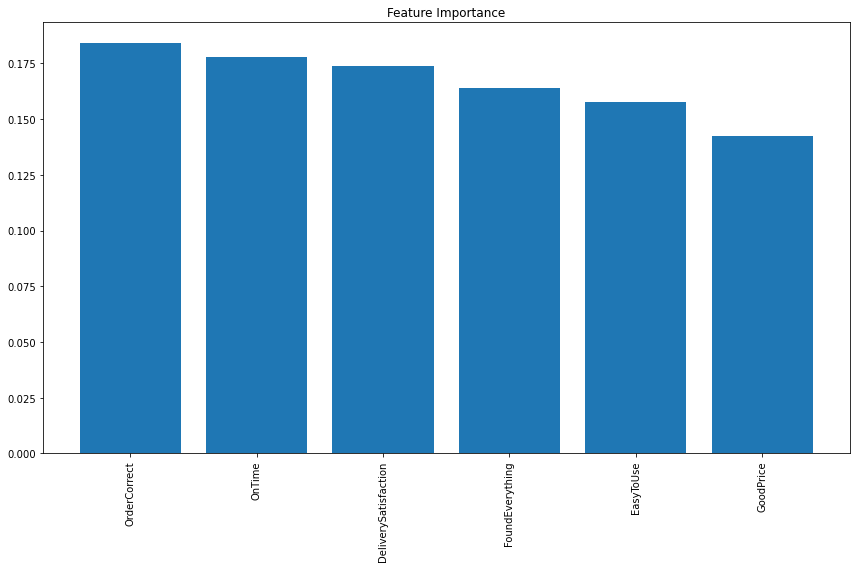

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#
# Load the wine datasets
#
df = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0, names=columns)
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, :1], test_size = 0.3, random_state=1)
#
# Feature scaling
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Training / Test Dataframe
#
cols = columns[1:]
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

from sklearn.ensemble import RandomForestClassifier
#
# Train the mode
#
forest = RandomForestClassifier(n_estimators=200, max_depth=9, min_samples_split=4)
forest.fit(X_train_std, y_train.values.ravel())

importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]


import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()